## Convolutional neurel network to classify 25 architectural styles with fastai library 

Dataset: https://www.kaggle.com/wwymak/architecture-dataset/version/1

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt 

#### Dataset

In [3]:
bs = 64

In [7]:
path = Path('/home/wyquek/.fastai/data/arcDataset/images') # directory on local drive

In [8]:
path.ls()

[PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Baroque architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Queen Anne architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Ancient Egyptian architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Deconstructivism'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Gothic architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Byzantine architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Art Nouveau architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Tudor Revival architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Achaemenid architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Greek Revival architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Novelty architecture'),
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Bauhaus architecture'),
 PosixPath('

Number of labels and number of images in dataset:

In [10]:
sum(1 for label in path.ls()), sum(len(label.ls()) for label in path.ls() )

(25, 4794)

#### Creating a data object

In [13]:
data = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(), valid_pct= 0.2,size = 224)

In [14]:
data.normalize(imagenet_stats) # normalize to same mean and std dev

ImageDataBunch;
Train: LabelList
y: CategoryList (3836 items)
['Baroque architecture' 'Baroque architecture' 'Baroque architecture' 'Baroque architecture' ...
 'Chicago school architecture' 'Chicago school architecture' 'Chicago school architecture'
 'Chicago school architecture']
Path: .
x: ImageItemList (3836 items)
[PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Baroque architecture/101_800px-Goa_-_Basilica_of_Bom_Jesus%2C_views_inside_and_around26.JPG')
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Baroque architecture/4697_450px-Paris%2C_Val_de_Gr%C3%A2ce.jpg_03.JPG')
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Baroque architecture/867_394px-Chiesa_della_Piet%C3%A0_Venezia.jpg')
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Baroque architecture/1640_800px-Karlskirche_Vienna_June_2006_476.jpg')
 ...
 PosixPath('/home/wyquek/.fastai/data/arcDataset/images/Chicago school architecture/135_400px-Railway_exchange_building.jpg')
 PosixPath('/home/w

#### Image samples

Let's look at some image samples

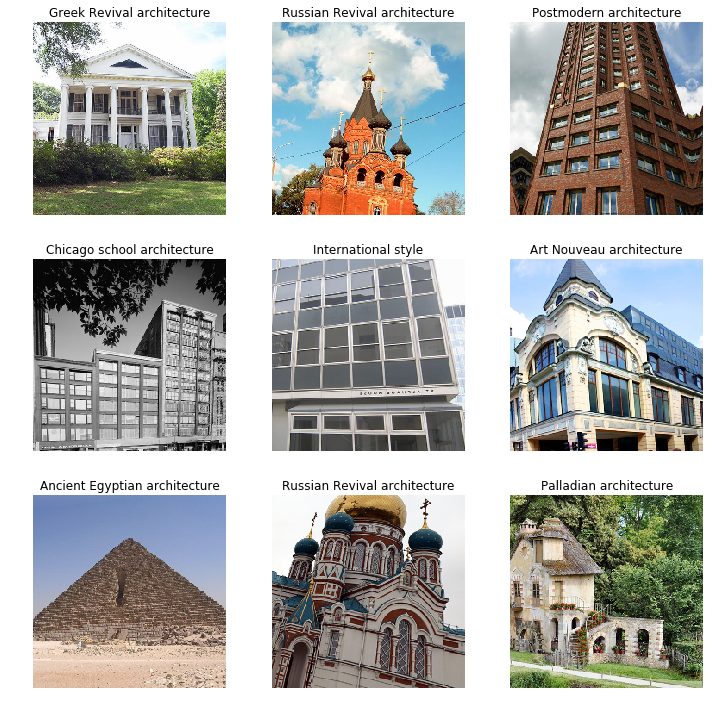

In [19]:
data.show_batch(rows = 3, figsize = (10,10))  # note that it's centre-cropping and resizing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


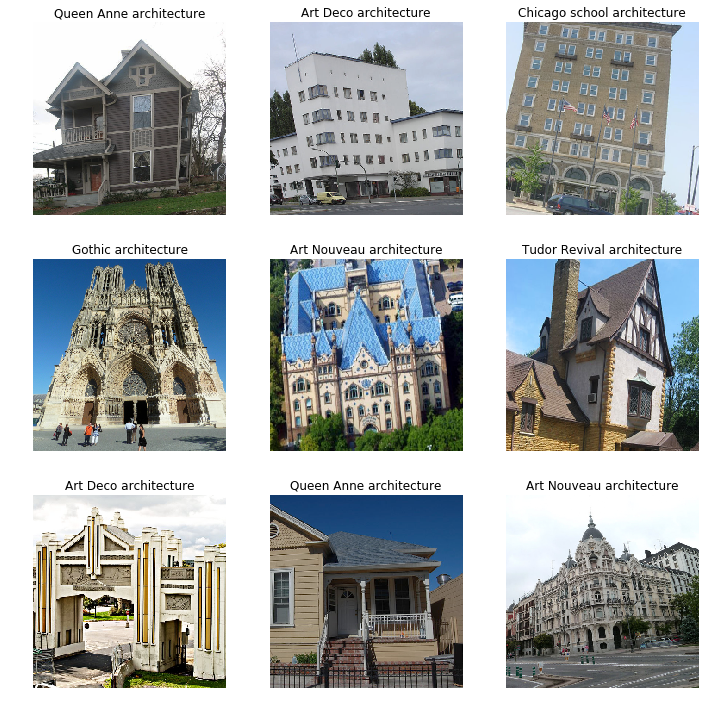

In [20]:
data.show_batch(rows = 3, figsize = (10,10))

#### Labels

The labels are named 1-102

In [21]:
print(data.classes)

['Baroque architecture', 'Queen Anne architecture', 'Ancient Egyptian architecture', 'Deconstructivism', 'Gothic architecture', 'Byzantine architecture', 'Art Nouveau architecture', 'Tudor Revival architecture', 'Achaemenid architecture', 'Greek Revival architecture', 'Novelty architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Colonial architecture', 'Georgian architecture', 'American craftsman style', 'American Foursquare architecture', 'Romanesque architecture', 'International style', 'Art Deco architecture', 'Russian Revival architecture', 'Edwardian architecture', 'Postmodern architecture', 'Palladian architecture', 'Chicago school architecture']


There are a total of 102 classes.

In [22]:
len(data.classes), data.c

(25, 25)

#### Training

In [27]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

Using the [1cycle policy](https://sgugger.github.io/the-1cycle-policy.html#the-1cycle-policy), we can train the model much faster.

In [28]:
learn.fit_one_cycle(4)

Total time: 19:51
epoch  train_loss  valid_loss  error_rate
1      2.354004    1.333494    0.387265    (04:36)
2      1.608737    1.044224    0.312109    (06:00)
3      1.222101    0.926558    0.277662    (04:46)
4      1.028517    0.905313    0.268267    (04:28)



In [29]:
learn.save("stage-1")

In [30]:
interpret = ClassificationInterpretation.from_learner(learn)

#### Wrong predictions

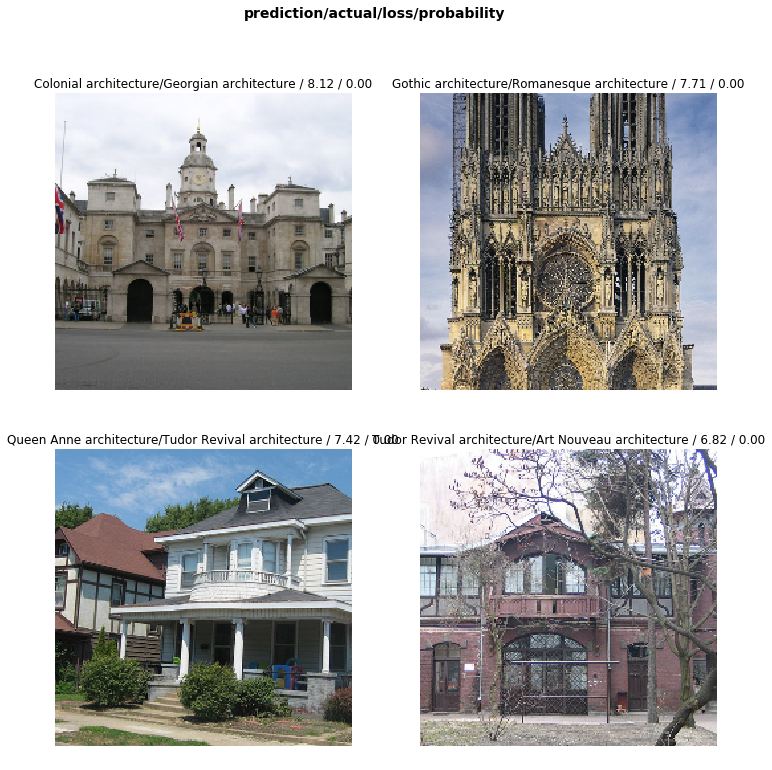

In [45]:
interpret.plot_top_losses(4)

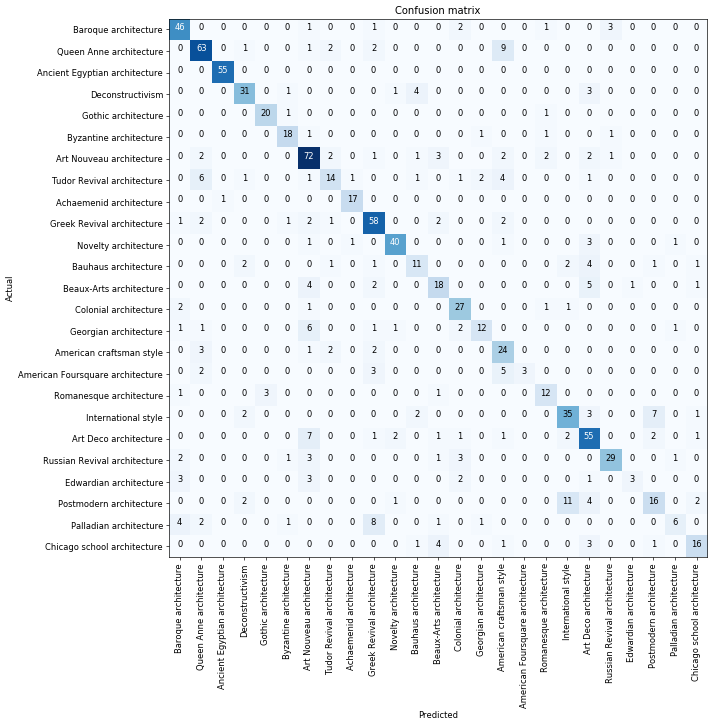

In [47]:
interpret.plot_confusion_matrix(figsize=(12,12), dpi = 60)

In [48]:
interpret.most_confused(min_val=3) 

[('Postmodern architecture', 'International style', 11),
 ('Queen Anne architecture', 'American craftsman style', 9),
 ('Palladian architecture', 'Greek Revival architecture', 8),
 ('International style', 'Postmodern architecture', 7),
 ('Art Deco architecture', 'Art Nouveau architecture', 7),
 ('Tudor Revival architecture', 'Queen Anne architecture', 6),
 ('Georgian architecture', 'Art Nouveau architecture', 6),
 ('Beaux-Arts architecture', 'Art Deco architecture', 5),
 ('American Foursquare architecture', 'American craftsman style', 5),
 ('Deconstructivism', 'Bauhaus architecture', 4),
 ('Tudor Revival architecture', 'American craftsman style', 4),
 ('Bauhaus architecture', 'Art Deco architecture', 4),
 ('Beaux-Arts architecture', 'Art Nouveau architecture', 4),
 ('Postmodern architecture', 'Art Deco architecture', 4),
 ('Palladian architecture', 'Baroque architecture', 4),
 ('Chicago school architecture', 'Beaux-Arts architecture', 4)]

In [ ]:
learn.lr_find()

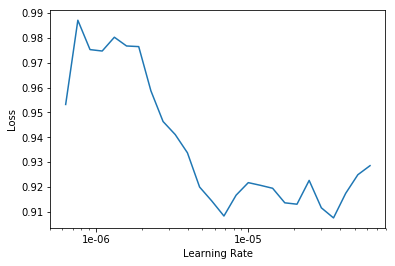

In [50]:
learn.recorder.plot()

In [51]:
learn.unfreeze()

In [52]:
learn.fit_one_cycle(2, max_lr= slice(1e-7,7e-6))

Total time: 12:48
epoch  train_loss  valid_loss  error_rate
1      0.884749    0.903550    0.270355    (06:31)
2      0.896808    0.901320    0.264092    (06:16)



Error rate: 26%

In [53]:
learn.save("stage-2")

Reference:

1. ["Architectural Style Classification using Multinomial Latent Logistic Regression" (ECCV2014)](https://sites.google.com/site/zhexuutssjtu/projects/arch)

2. https://docs.fast.ai/